In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import warnings 
warnings.simplefilter('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [6]:
# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Display the first few rows of the dataset
df.head()
df.info()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
# Drop rows with missing values in critical columns
df = df.dropna(
    subset=['age', 'embarked', 'fare'
            , 'sex', 'pclass'])

# Encode categorical variables into numerical format
df['sex'] = df['sex'].map(
    {'male': 0, 'female': 1}
)

df['embarked'] = df['embarked'].map(
    {'C': 0
     , 'Q': 1
     , 'S': 2}
)

In [8]:
# Select features (X) and target variable (y)
X = df[['pclass', 'sex', 'age', 'fare', 'embarked']]
y = df['survived']

# Display the shape of the features and target
X.shape, y.shape

((712, 5), (712,))

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=27
)

# Display the shapes of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((569, 5), (143, 5), (569,), (143,))

In [10]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Initialize the SVC model with default parameters
svc = SVC()

# Fit the SVC model on the training data
svc.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
base_accuracy = svc.score(X_test_scaled, y_test)

# Display the base accuracy (optional for understanding but avoid excessive printing)
base_accuracy

SVC()

0.7902097902097902

In [9]:
np.logspace(-3,2,16).tolist()

[0.001,
 0.0021544346900318843,
 0.004641588833612777,
 0.01,
 0.021544346900318832,
 0.046415888336127774,
 0.1,
 0.21544346900318823,
 0.46415888336127775,
 1.0,
 2.154434690031882,
 4.6415888336127775,
 10.0,
 21.54434690031882,
 46.41588833612773,
 100.0]

In [12]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': np.logspace(-3, 2, 16)
    , 'kernel': ['rbf']
    # ['linear', 'rbf', 'poly']
    , 'gamma': ['scale', 'auto']
  #  , 'degree': [2, 3, 4]  # Only relevant for 'poly' kernel
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(
    estimator=svc
    , param_grid=param_grid
    , scoring='accuracy'
    , cv=5
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 2.15443469e-03, 4.64158883e-03, 1.00000000e-02,
       2.15443469e-02, 4.64158883e-02, 1.00000000e-01, 2.15443469e-01,
       4.64158883e-01, 1.00000000e+00, 2.15443469e+00, 4.64158883e+00,
       1.00000000e+01, 2.15443469e+01, 4.64158883e+01, 1.00000000e+02]),
                         'gamma': ['scale', 'auto'], 'kernel': ['rbf']},
             scoring='accuracy')

In [13]:
# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Display the best parameters (optional)
best_params, best_score

({'C': 46.41588833612773, 'gamma': 'scale', 'kernel': 'rbf'},
 0.7944263313150133)

In [14]:
# Retrieve the best SVM model from GridSearchCV
best_svc = grid_search.best_estimator_

# Fit the best SVM model on the training data (optional, as GridSearchCV already fits it)
best_svc.fit(X_train_scaled, y_train)

# Evaluate the best model on the test data
test_accuracy = best_svc.score(X_test_scaled, y_test)

# Display the test accuracy (optional)
test_accuracy

SVC(C=46.41588833612773)

0.8111888111888111

In [15]:
from sklearn.metrics import (
    confusion_matrix
    , classification_report
    , ConfusionMatrixDisplay
    , roc_auc_score
    , RocCurveDisplay
    , PrecisionRecallDisplay
)

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict the test labels using the best model
y_pred = best_svc.predict(X_test_scaled)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
conf_matrix

array([[72, 13],
       [14, 44]])

In [17]:
# Generate the classification report
class_report = classification_report(y_test, y_pred)

# Display the classification report
print(class_report)

              precision    recall  f1-score   support

           0       0.84      0.85      0.84        85
           1       0.77      0.76      0.77        58

    accuracy                           0.81       143
   macro avg       0.80      0.80      0.80       143
weighted avg       0.81      0.81      0.81       143



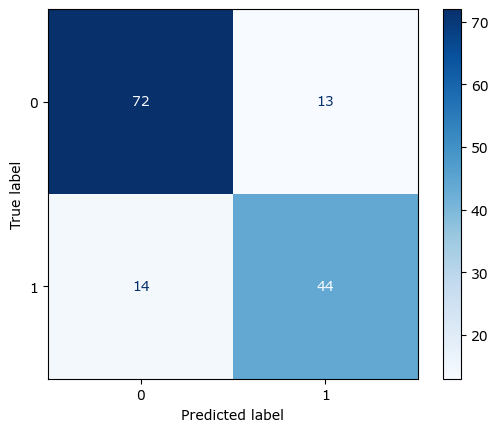

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

# Create a ConfusionMatrixDisplay object
conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_svc.classes_)

# Plot the confusion matrix
conf_matrix_display.plot(cmap='Blues')

In [19]:
from sklearn.metrics import roc_auc_score

# Calculate the decision function or probabilities (depending on the SVM setup)
# Use `decision_function` for SVC models
y_score = best_svc.decision_function(X_test_scaled)

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_score)

# Display the ROC AUC score
roc_auc

0.8752535496957403

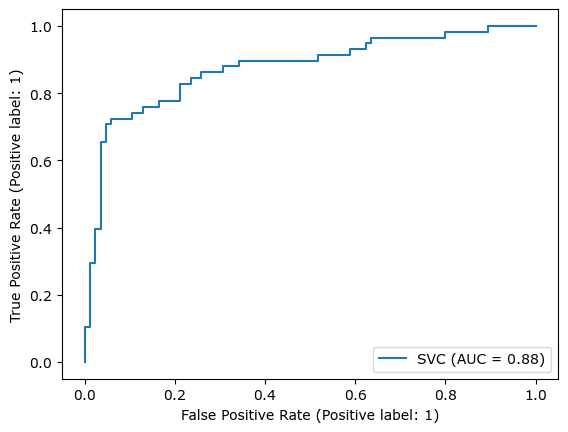

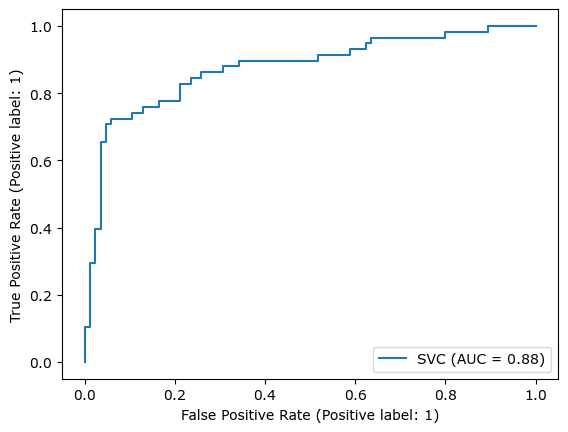

In [20]:
from sklearn.metrics import RocCurveDisplay

# Create a RocCurveDisplay object
roc_display = RocCurveDisplay.from_estimator(best_svc, X_test_scaled, y_test)

# Plot the ROC curve
roc_display.plot();

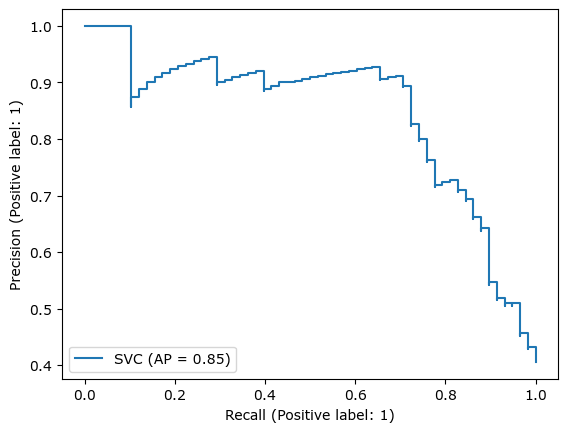

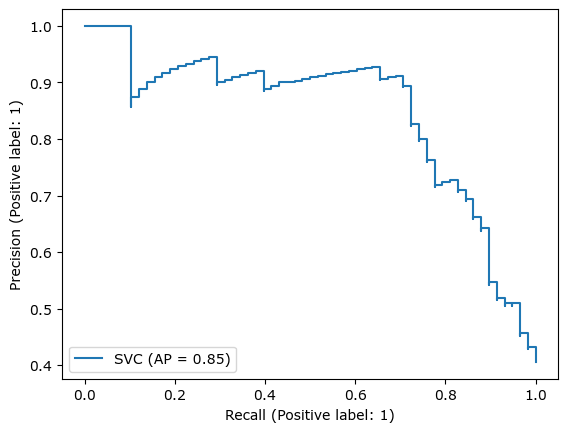

In [21]:
from sklearn.metrics import PrecisionRecallDisplay

# Create a PrecisionRecallDisplay object
pr_display = PrecisionRecallDisplay.from_estimator(best_svc, X_test_scaled, y_test)

# Plot the precision-recall curve
pr_display.plot();